In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
demographic_data = pd.read_csv('dataset//Internet-Demographic.csv')

# 1. Distribution of Birth Rates
##### The histogram shows that the birth rates across countries are mostly concentrated in the lower ranges, with a peak around 10-15. The distribution is right-skewed, indicating that fewer countries have very high birth rates. There appears to be a secondary, smaller peak in the birth rate distribution around 35-40.

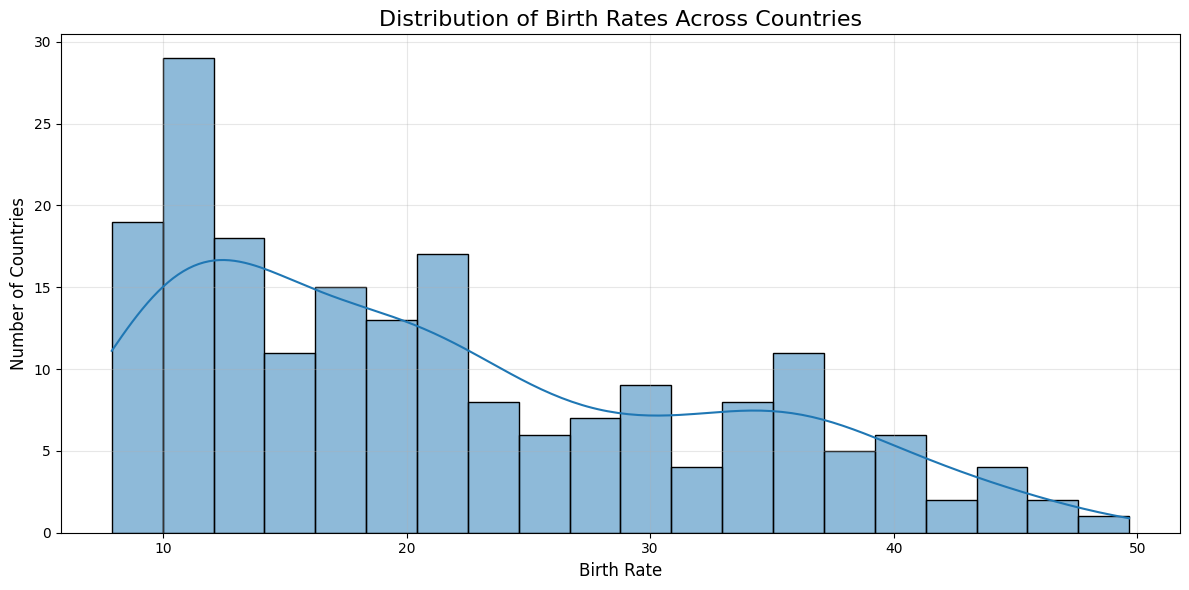

In [15]:
plt.figure(figsize=(12, 6))
birth_rate_hist = sns.histplot(data=demographic_data, x="Birth rate", bins=20, kde=True)
birth_rate_hist.set_title("Distribution of Birth Rates Across Countries", fontsize=16)
birth_rate_hist.set_xlabel("Birth Rate", fontsize=12)
birth_rate_hist.set_ylabel("Number of Countries", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("birth_rate_distribution.png")
plt.show()

# 2. Top 5 Countries with Highest Internet Usage
##### This bar graph displays the top 5 countries with the highest percentage of internet users. Iceland has the highest internet usage at 96.5%, followed closely by Bermuda, Norway, Sweden, and Denmark. The internet usage rates among these top 5 countries are all very high, ranging from 94.6% to 96.5%.

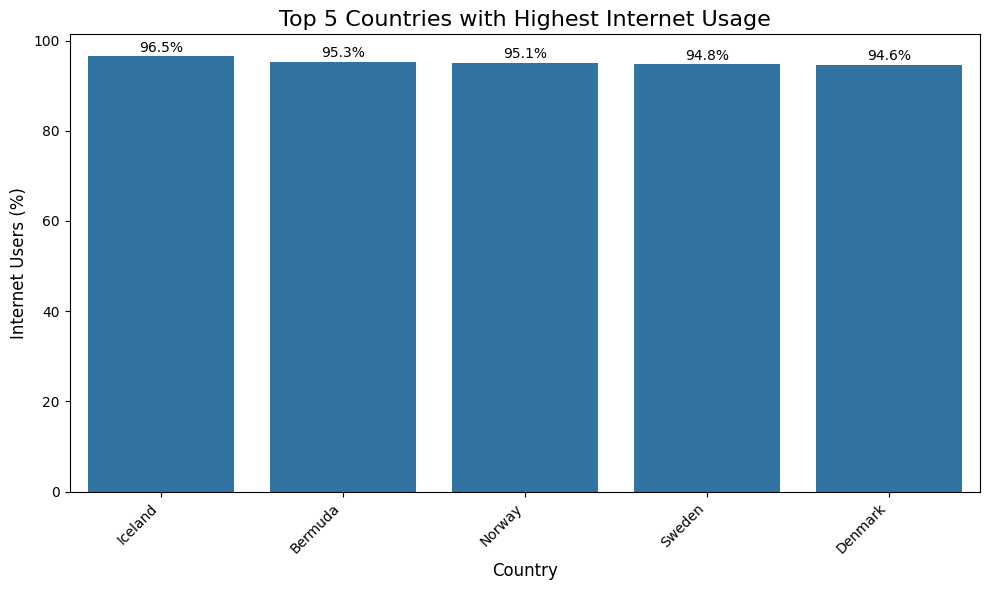

In [16]:
top_internet_countries = demographic_data.sort_values(by="Internet users", ascending=False).head(5)
plt.figure(figsize=(10, 6))
internet_bar = sns.barplot(data=top_internet_countries, x="Country Name", y="Internet users")
internet_bar.set_title("Top 5 Countries with Highest Internet Usage", fontsize=16)
internet_bar.set_xlabel("Country", fontsize=12)
internet_bar.set_ylabel("Internet Users (%)", fontsize=12)

for i, value in enumerate(top_internet_countries["Internet users"]):
    internet_bar.text(i, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Count of Countries by Income Group
##### The bar graph shows the distribution of the number of countries across different income groups. The "High income" group has the largest number of countries (67), followed by "Lower middle income" (50) and "Upper middle income" (48). The "Low income" group has the fewest number of countries (30) among the categories shown.

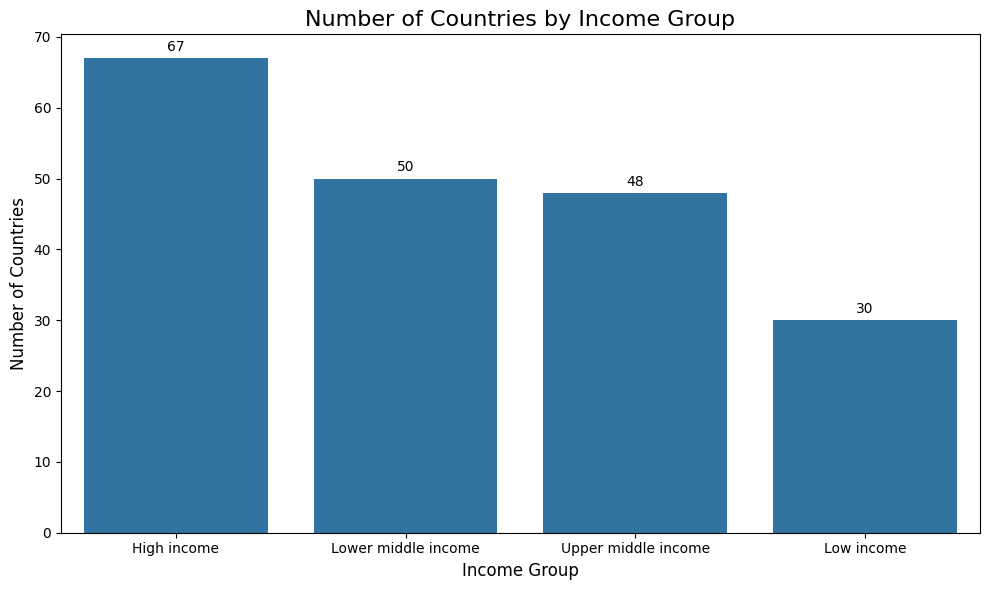

In [17]:
income_counts = demographic_data["Income Group"].value_counts().reset_index()
income_counts.columns = ["Income Group", "Count"]

plt.figure(figsize=(10, 6))
income_bar = sns.barplot(data=income_counts, x="Income Group", y="Count")
income_bar.set_title("Number of Countries by Income Group", fontsize=16)
income_bar.set_xlabel("Income Group", fontsize=12)
income_bar.set_ylabel("Number of Countries", fontsize=12)

# Add count values on top of bars
for i, value in enumerate(income_counts["Count"]):
    income_bar.text(i, value + 1, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig("countries_by_income_group.png")
plt.show()

# 4. Box Plot of Internet Usage
##### The box plot illustrates the distribution of internet usage (%) across different income groups. High-income countries generally have the highest internet usage, with a median around 75%. Internet usage tends to be lowest in low-income countries, with a median below 10% and a smaller range compared to other groups.

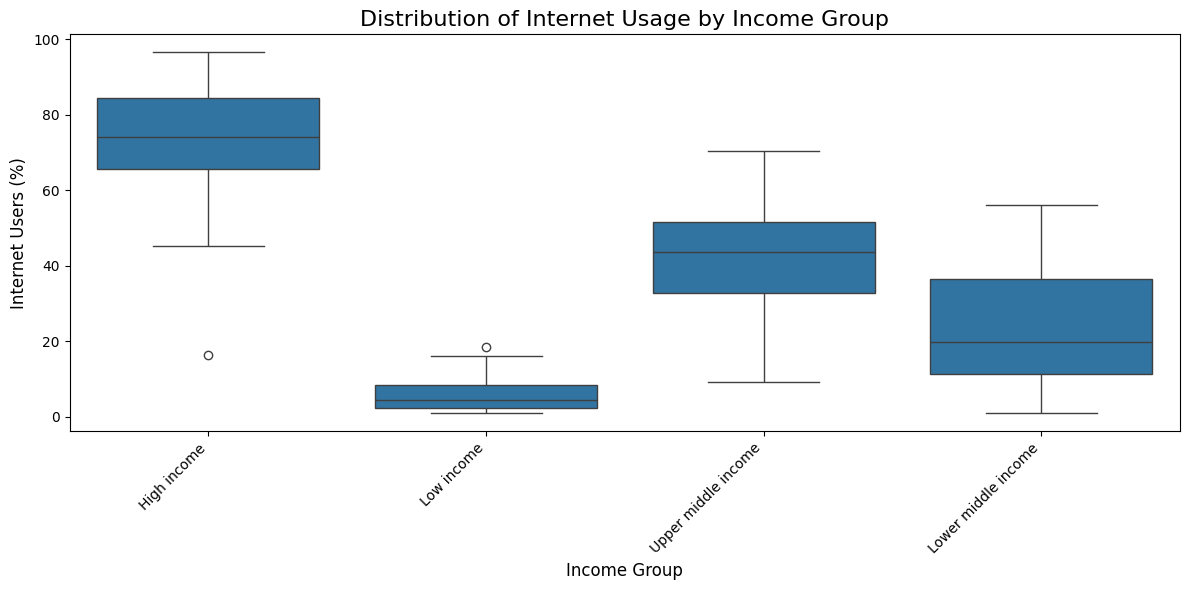

In [19]:
plt.figure(figsize=(12, 6))
internet_box = sns.boxplot(data=demographic_data, x="Income Group", y="Internet users")
internet_box.set_title("Distribution of Internet Usage by Income Group", fontsize=16)
internet_box.set_xlabel("Income Group", fontsize=12)
internet_box.set_ylabel("Internet Users (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Countries with No Internet Access (approx. 0%)
##### This horizontal bar graph highlights the countries with the lowest internet access, all at or below 2%. Eritrea has the least internet access at 0.9%, followed by Timor-Leste and Burundi. The percentage of internet users gradually increases for the subsequent countries listed, reaching 1.9% in Ethiopia.

C:\Users\natha\AppData\Local\Temp\ipykernel_8832\2511782159.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  no_internet_bar = sns.barplot(


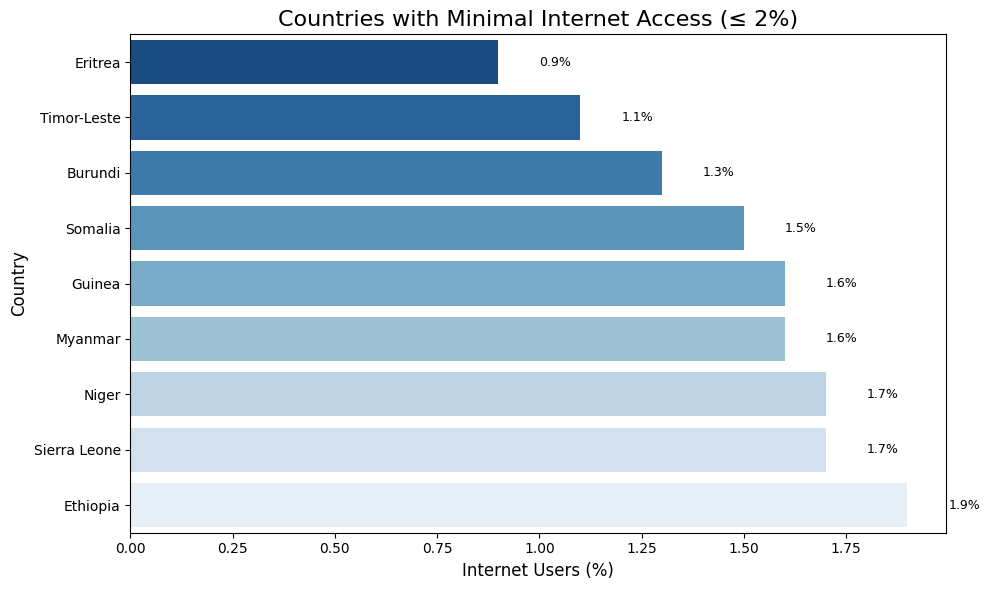

In [22]:
no_internet_countries = demographic_data[demographic_data["Internet users"] <= 2].sort_values(by="Internet users")

plt.figure(figsize=(10, max(6, len(no_internet_countries) * 0.4)))
no_internet_bar = sns.barplot(
    data=no_internet_countries, 
    y="Country Name", 
    x="Internet users",
    palette="Blues_r"
)
no_internet_bar.set_title("Countries with Minimal Internet Access (≤ 2%)", fontsize=16)
no_internet_bar.set_xlabel("Internet Users (%)", fontsize=12)
no_internet_bar.set_ylabel("Country", fontsize=12)

for i, value in enumerate(no_internet_countries["Internet users"]):
    no_internet_bar.text(value + 0.1, i, f"{value:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.savefig("countries_with_minimal_internet.png")
plt.show()

# 6. Average Birth Rate
##### This scatter plot shows the birth rates of different countries, ranked from lowest to highest, and color-coded by income group. There is a clear trend of increasing birth rates as you move from high-income countries towards low-income countries. The global average birth rate is approximately 21.47, with many low-income countries exceeding this average and most high-income countries falling below it.

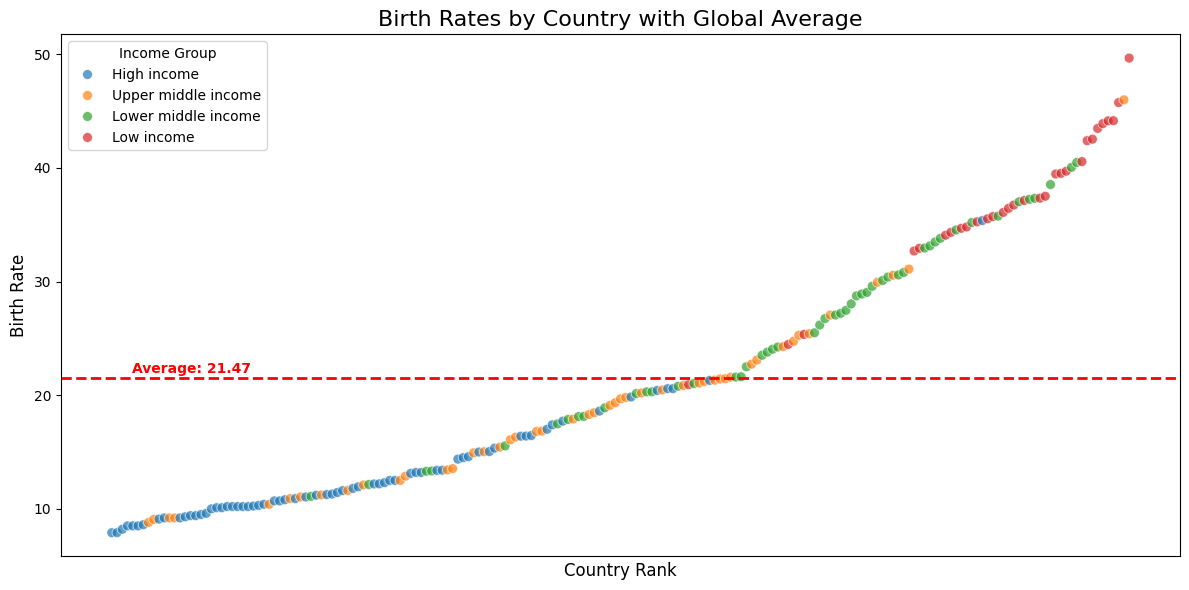

In [23]:
plt.figure(figsize=(12, 6))
sorted_birth_data = demographic_data.sort_values(by="Birth rate")
average_birth_rate = demographic_data["Birth rate"].mean()

birth_comparison = sns.scatterplot(
    data=sorted_birth_data,
    x=range(len(sorted_birth_data)),
    y="Birth rate",
    hue="Income Group",
    alpha=0.7,
    s=50
)

plt.axhline(y=average_birth_rate, color='red', linestyle='--', linewidth=2)
plt.text(
    len(demographic_data) * 0.02, 
    average_birth_rate + 0.5, 
    f"Average: {average_birth_rate:.2f}", 
    color='red', 
    fontweight='bold'
)

birth_comparison.set_title("Birth Rates by Country with Global Average", fontsize=16)
birth_comparison.set_xlabel("Country Rank", fontsize=12)
birth_comparison.set_ylabel("Birth Rate", fontsize=12)
plt.xticks([])  # Hide x-axis labels as they'd be too crowded
plt.legend(title="Income Group", loc="upper left")
plt.tight_layout()
plt.savefig("birth_rate_with_average.png")
plt.show()

# 7. Scatter Plot: Birth Rate vs. Internet Usage
##### This scatter plot explores the relationship between birth rate and internet usage, with points colored by income group. There appears to be a general negative correlation: as internet usage increases, birth rates tend to decrease. High-income countries generally exhibit high internet usage and low birth rates, while low-income countries tend to have lower internet usage and higher birth rates.

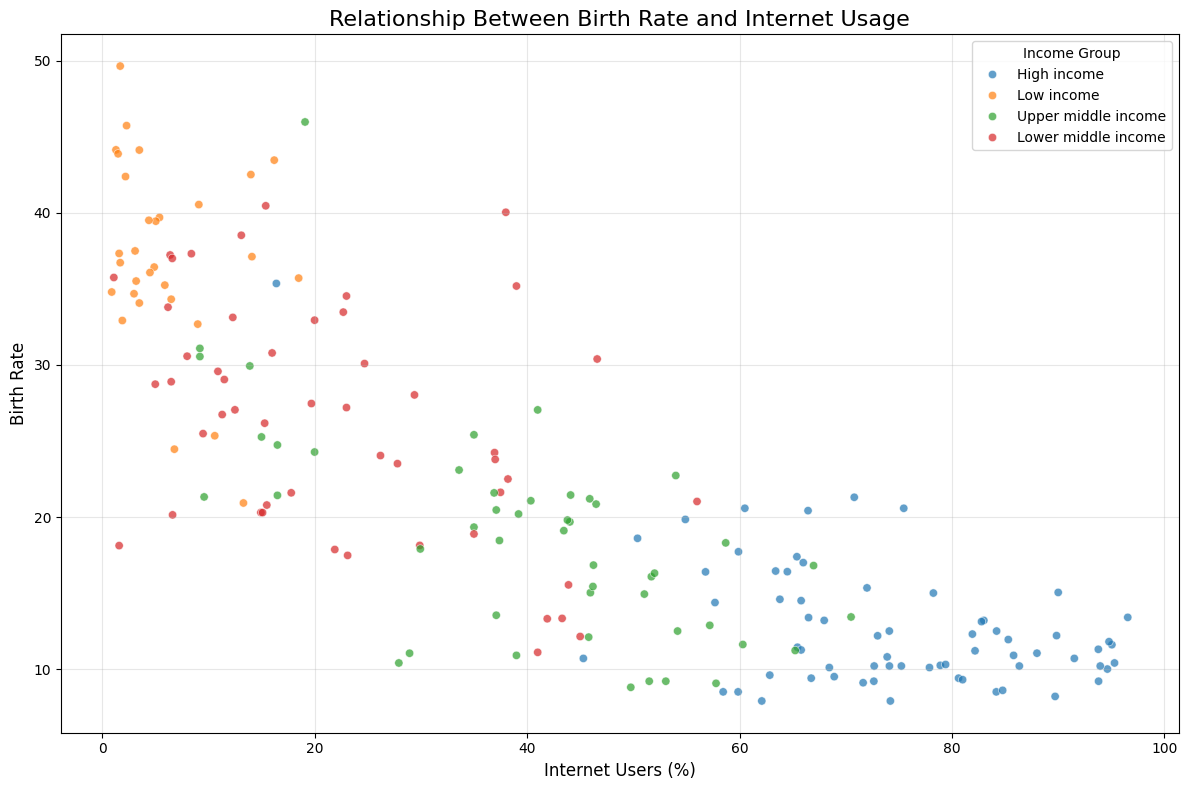

In [25]:
plt.figure(figsize=(12, 8))
birth_internet_scatter = sns.scatterplot(
    data=demographic_data, 
    x="Internet users", 
    y="Birth rate",
    hue="Income Group",
    alpha=0.7
)
birth_internet_scatter.set_title("Relationship Between Birth Rate and Internet Usage", fontsize=16)
birth_internet_scatter.set_xlabel("Internet Users (%)", fontsize=12)
birth_internet_scatter.set_ylabel("Birth Rate", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title="Income Group", loc="upper right")
plt.tight_layout()
plt.show()


# 8. Countries with Birth Rates Above 40
##### This horizontal bar graph displays countries with birth rates exceeding 40, ordered from lowest to highest birth rate. Niger has the highest birth rate among this group at 49.7, followed by Angola at 46.0. The majority of these countries with very high birth rates are classified as low-income, with a few being lower-middle or upper-middle income.

C:\Users\natha\AppData\Local\Temp\ipykernel_8832\4044387761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  high_birth_bar = sns.barplot(


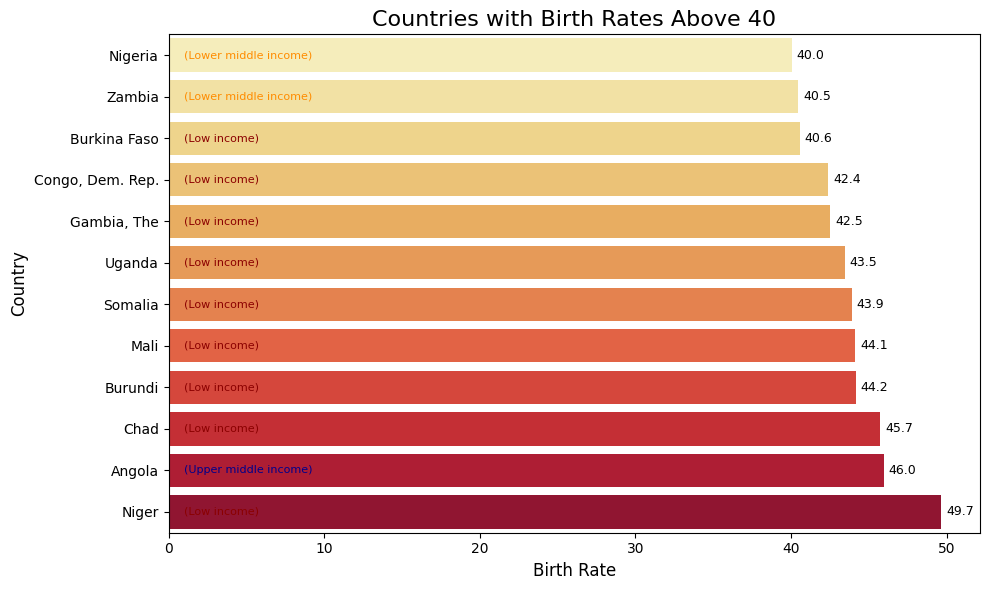

In [26]:
high_birth_countries = demographic_data[demographic_data["Birth rate"] > 40].sort_values(by="Birth rate")

plt.figure(figsize=(10, max(6, len(high_birth_countries) * 0.5))) 
high_birth_bar = sns.barplot(
    data=high_birth_countries, 
    y="Country Name", 
    x="Birth rate",
    palette="YlOrRd"
)
high_birth_bar.set_title("Countries with Birth Rates Above 40", fontsize=16)
high_birth_bar.set_xlabel("Birth Rate", fontsize=12)
high_birth_bar.set_ylabel("Country", fontsize=12)

for i, value in enumerate(high_birth_countries["Birth rate"]):
    high_birth_bar.text(value + 0.3, i, f"{value:.1f}", va='center', fontsize=9)

for i, country in enumerate(high_birth_countries["Country Name"]):
    income_group = high_birth_countries[high_birth_countries["Country Name"] == country]["Income Group"].values[0]
    color = "darkgreen" if income_group == "High income" else "darkblue" if income_group == "Upper middle income" else "darkorange" if income_group == "Lower middle income" else "darkred"
    high_birth_bar.text(1, i, f"({income_group})", va='center', fontsize=8, color=color)

plt.tight_layout()
plt.savefig("countries_with_high_birth_rates.png")
plt.show()

# 9. Pie Chart of Income Groups
##### This pie chart illustrates the proportion of countries belonging to different income groups. High-income countries represent the largest share at 34.4%, followed by lower middle-income countries at 25.6% and upper middle-income countries at 24.6%. Low-income countries constitute the smallest proportion at 15.4% of the total.

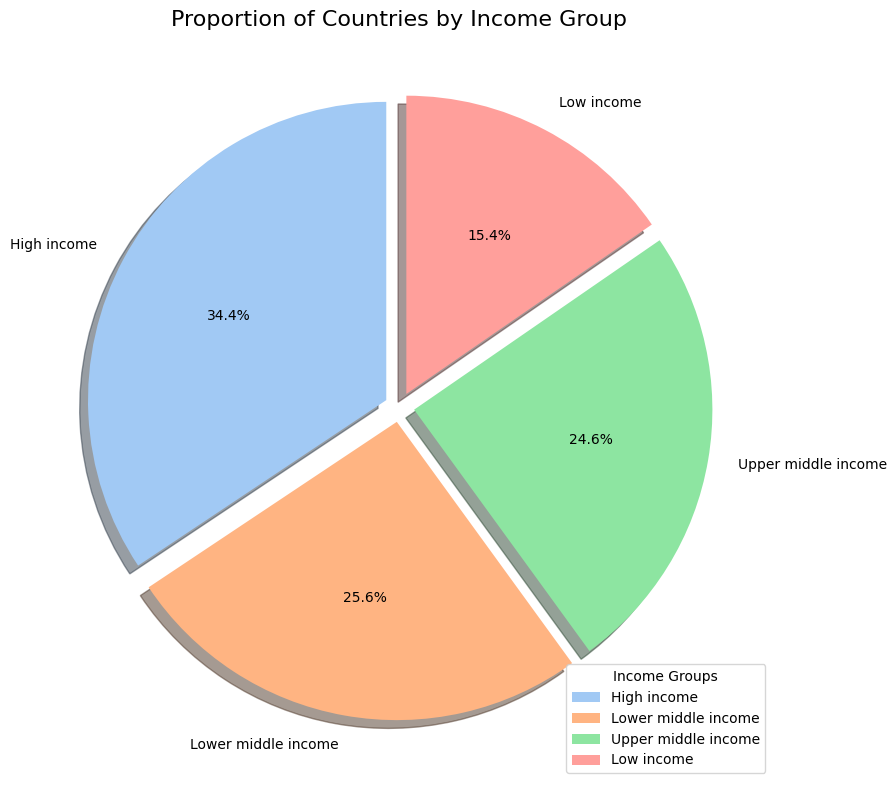

In [27]:
income_group_counts = demographic_data["Income Group"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(
    income_group_counts, 
    labels=income_group_counts.index, 
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05, 0.05, 0.05, 0.05],
    shadow=True,
    colors=sns.color_palette("pastel")
)
plt.title("Proportion of Countries by Income Group", fontsize=16)
plt.legend(title="Income Groups", loc="lower right")
plt.tight_layout()
plt.savefig("income_group_pie_chart.png")
plt.show()

# 10. Correlation Between Birth Rate and Internet Usage
##### This heatmap displays the correlation between birth rate and internet users. The correlation coefficient between birth rate and internet users is -0.82, indicating a strong negative correlation. This suggests that as internet usage increases, birth rates tend to decrease, and vice versa.

Correlation between Birth Rate and Internet Usage: -0.8156
This indicates a strong negative correlation.


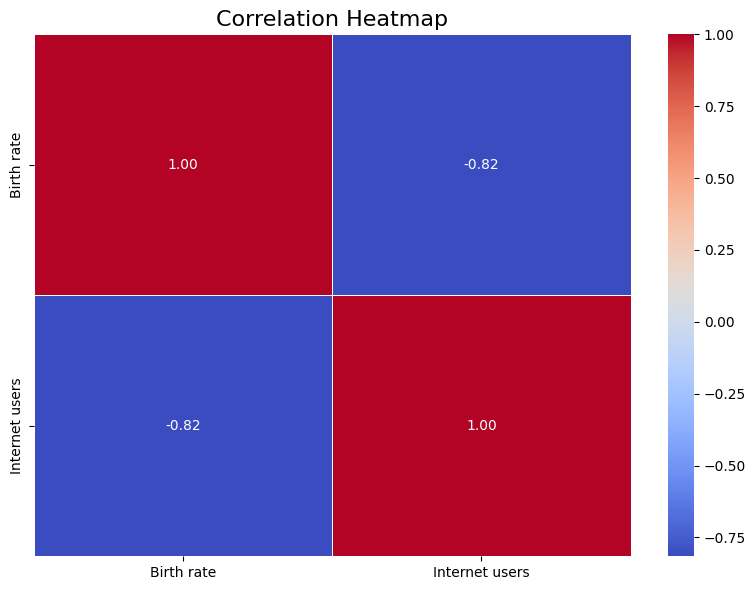

In [32]:
correlation = demographic_data["Birth rate"].corr(demographic_data["Internet users"])
print(f"Correlation between Birth Rate and Internet Usage: {correlation:.4f}")

if correlation < -0.7:
    interpretation = "strong negative"
elif correlation < -0.3:
    interpretation = "moderate negative"
elif correlation < 0:
    interpretation = "weak negative"
elif correlation < 0.3:
    interpretation = "weak positive"
elif correlation < 0.7:
    interpretation = "moderate positive"
else:
    interpretation = "strong positive"

print(f"This indicates a {interpretation} correlation.")

plt.figure(figsize=(8, 6))
correlation_data = demographic_data[["Birth rate", "Internet users"]].copy()
correlation_matrix = correlation_data.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
heatmap.set_title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()